Autor: Guilherme Rodrigues dos Santos

# Questão 1
Utilizando Python, responda às seguintes perguntas:
a. Qual a média das idades dos compradores?
b. Quem é o comprador mais velho e o mais novo?
c. Qual produto teve mais vendas?

In [81]:
import pandas as pd
from math import trunc
dadosFrame = pd.read_csv('Exercicio Aberto.csv')
mediaIdadeCompradores = trunc(dadosFrame['Idade'].mean()*10)/10
dadosFrame["Idade"] = dadosFrame["Idade"].fillna(mediaIdadeCompradores)
idCompradorMaisVelho = dadosFrame['Idade'].idxmax()
idCompradorMaisNovo = dadosFrame['Idade'].idxmin()
print(f'Resposta da letra (a):\n A media de idade dos compradores {mediaIdadeCompradores}')
print(f"Resposta da letra (b):\n O comprador mais velho tem o ID {dadosFrame.loc[idCompradorMaisVelho,'id_comprador']}, com {dadosFrame.loc[idCompradorMaisVelho,'Idade']} anos")
print(f"Resposta da letra (c):\n O comprador mais velho tem o ID {dadosFrame.loc[idCompradorMaisNovo,'id_comprador']}, com {dadosFrame.loc[idCompradorMaisNovo,'Idade']} anos")

Resposta da letra (a):
 A media de idade dos compradores 25.7
Resposta da letra (b):
 O comprador mais velho tem o ID 76, com 60.0 anos
Resposta da letra (c):
 O comprador mais velho tem o ID 154, com 0.0 anos


# Questão 2
Utilizando Python, mostre em um gráfico qual foi o método de pagamento
mais utilizado pelos compradores.

(array([0, 1, 2]),
 [Text(0, 0, 'Pix'), Text(1, 0, 'Boleto'), Text(2, 0, 'Cartão de Crédito')])

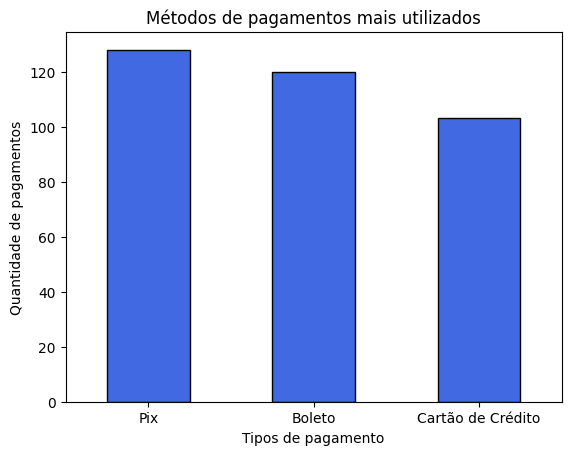

In [109]:
import matplotlib.pyplot as plt
groupedMetodoPagamento = dadosFrame.groupby("Tipo de Pagamento")["Tipo de Pagamento"].count().sort_values(ascending=False)
plt.figure()
groupedMetodoPagamento.plot.bar(color='royalblue',edgecolor='black')
plt.title("Métodos de pagamentos mais utilizados")
plt.ylabel("Quantidade de pagamentos")
plt.xlabel("Tipos de pagamento")
plt.xticks(rotation=0)

# Questão 3
Utilizando Python, mostre em um gráfico a quantidade de vendas por mês.

Text(0, 0.5, 'Quantidade de vendas')

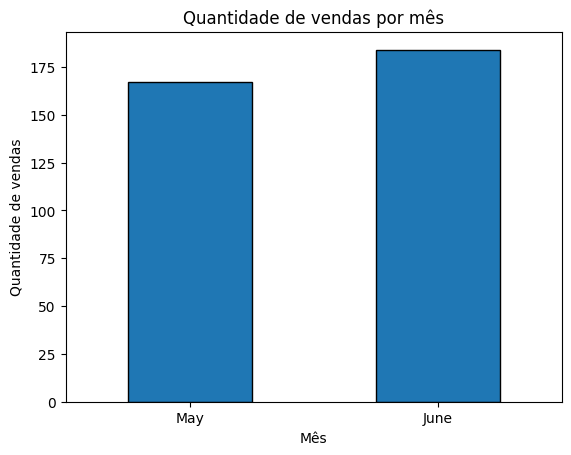

In [124]:
dadosFrame["Data de Venda"] = pd.to_datetime(dadosFrame["Data de Venda"])
groupedDataVendaFrame = dadosFrame.groupby(pd.Grouper(key='Data de Venda',freq='ME'))["Data de Venda"].count()
plt.figure()
groupedDataVendaFrame.plot(kind='bar',edgecolor='black')
plt.xticks(ticks=range(len(groupedDataVendaFrame)),labels=groupedDataVendaFrame.index.strftime('%B'),rotation=0)
plt.title("Quantidade de vendas por mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade de vendas")

# Questão 4
Utilizando Python, mostre em um gráfico as vendas por estado

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'SÃO PAULO'),
  Text(1, 0, 'BAHIA'),
  Text(2, 0, 'MINAS GERAIS'),
  Text(3, 0, 'GOIÁS'),
  Text(4, 0, 'PARÁ'),
  Text(5, 0, 'DISTRITO FEDERAL'),
  Text(6, 0, 'AMAZONAS'),
  Text(7, 0, 'RIO DE JANEIRO'),
  Text(8, 0, 'SANTA CTARINA'),
  Text(9, 0, 'SERGIPE'),
  Text(10, 0, 'ESPIRITO SANTO'),
  Text(11, 0, 'PARA'),
  Text(12, 0, 'PIAUÍ'),
  Text(13, 0, 'CEARÁ'),
  Text(14, 0, 'MARANHÃO'),
  Text(15, 0, 'TOCANTINS')])

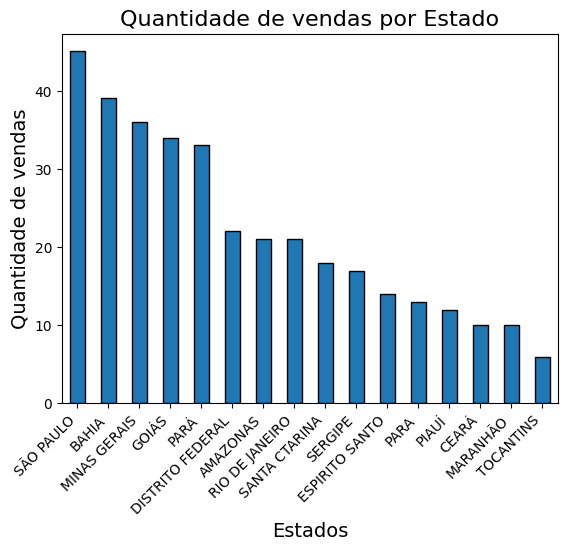

In [125]:
dadosFrame["Localização"] = dadosFrame["Localização"].str.upper()
groupedEstadoFrame = dadosFrame.groupby("Localização")["Localização"].count().sort_values(ascending=False)
plt.figure()
groupedEstadoFrame.plot(kind='bar',edgecolor='black')
plt.title("Quantidade de vendas por Estado",fontsize=16)
plt.xlabel("Estados",fontsize=14)
plt.ylabel("Quantidade de vendas",fontsize=14)
plt.xticks(rotation=45,ha='right')